In [130]:
import numpy as np
import pandas as pd
import sidetable as stb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
import math

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None 

In [131]:
df_travel = pd.read_csv("data/travel insurance.csv")
df_travel.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
26289,EPX,Travel Agency,Online,Cancellation Plan,No,44,"KOREA, REPUBLIC OF",26.0,0.0,NaN,36
44496,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,4,THAILAND,20.0,0.0,NaN,36
56659,JZI,Airlines,Online,Basic Plan,No,7,THAILAND,22.0,7.7,F,18
25943,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,83,TUNISIA,104.0,0.0,NaN,36
17414,EPX,Travel Agency,Online,Cancellation Plan,No,18,MALAYSIA,10.0,0.0,NaN,39


In [132]:
# comprobamos cantidad de datos
df_travel.shape

(63326, 11)

In [133]:
# comprobamos tipo de datos

df_travel.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [134]:
# comprobamos nulos
df_travel.stb.missing()

,missing,total,percent
Gender,45107,63326,71.229827
Agency,0,63326,0.000000
Agency Type,0,63326,0.000000
Distribution Channel,0,63326,0.000000
Product Name,0,63326,0.000000
Claim,0,63326,0.000000
Duration,0,63326,0.000000
Destination,0,63326,0.000000
Net Sales,0,63326,0.000000
Commision (in value),0,63326,0.000000


In [135]:
# hay una columna con más de un 70% de nulos, la eliminamos porque no nos aporta valor añadido

df_travel= df_travel.drop("Gender", axis= 1)
df_travel.sample()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
50779,C2B,Airlines,Online,Annual Silver Plan,No,365,SINGAPORE,216.0,54.0,38


In [136]:
# comprobamos duplicados

df_travel.duplicated().sum()

8670

In [137]:
# creamos un df sólo con los duplicados para explorarlos

df_travel_dupli = df_travel[df_travel.duplicated()]
df_travel_dupli.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
41478,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,6,MALAYSIA,29.7,17.82,51
44668,EPX,Travel Agency,Online,Cancellation Plan,No,28,INDIA,35.0,0.00,36
53074,EPX,Travel Agency,Online,Cancellation Plan,No,40,HONG KONG,0.0,0.00,36
25229,EPX,Travel Agency,Online,Cancellation Plan,No,6,MALAYSIA,10.0,0.00,36
32106,EPX,Travel Agency,Online,Cancellation Plan,No,26,SINGAPORE,10.0,0.00,36


### NOTAS:

- son datos tan genéricos que puede que haya 2 personas de 25 años que hayan viajado al mismo destino durante el mismo periodo (viajes organizados por ejemplo)

- vemos que hay registros con una edad de 118, vamos a explorarlos

In [138]:
df_travel[df_travel["Age"]== 118] 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.10,118
105,JWT,Airlines,Online,Value Plan,No,11,INDIA,50.0,20.00,118
220,JWT,Airlines,Online,Value Plan,No,4,INDIA,62.0,24.80,118
367,JWT,Airlines,Online,Value Plan,No,16,INDIA,50.0,20.00,118
402,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,118
...,...,...,...,...,...,...,...,...,...,...
62920,JWT,Airlines,Online,Value Plan,No,2,INDIA,31.0,12.40,118
62953,ART,Airlines,Online,Value Plan,No,14,FRANCE,59.0,20.65,118
63096,ART,Airlines,Online,Value Plan,No,42,HONG KONG,61.0,21.35,118
63182,JWT,Airlines,Online,Value Plan,No,21,INDIA,39.0,15.60,118


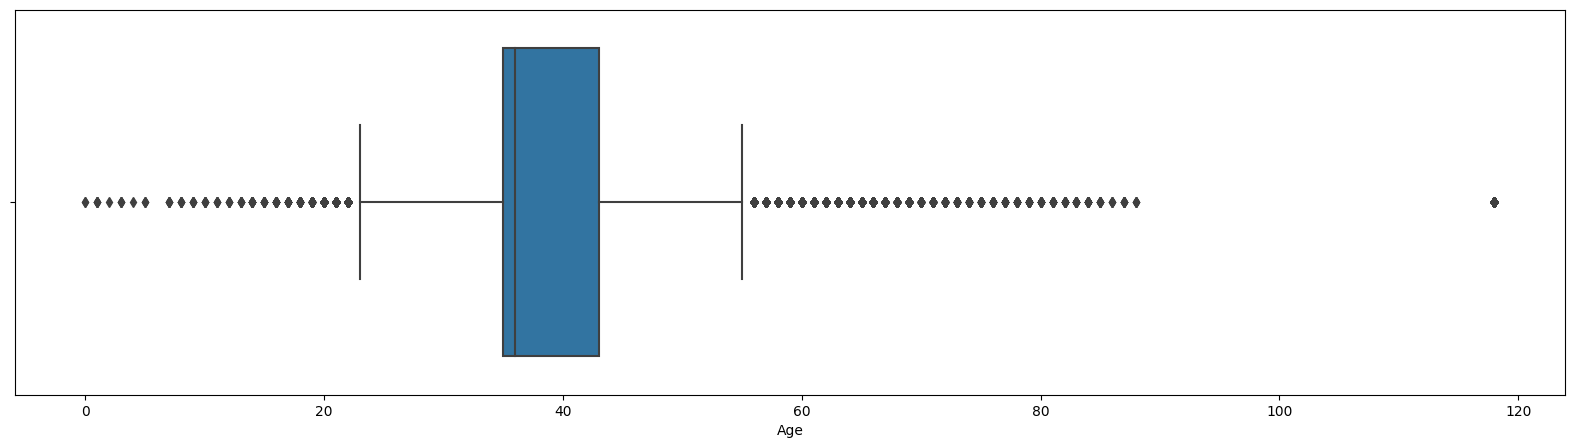

In [139]:
plt.figure(figsize = (20,5))
sns.boxplot(data = df_travel, x = "Age");

<Axes: xlabel='Age', ylabel='Count'>

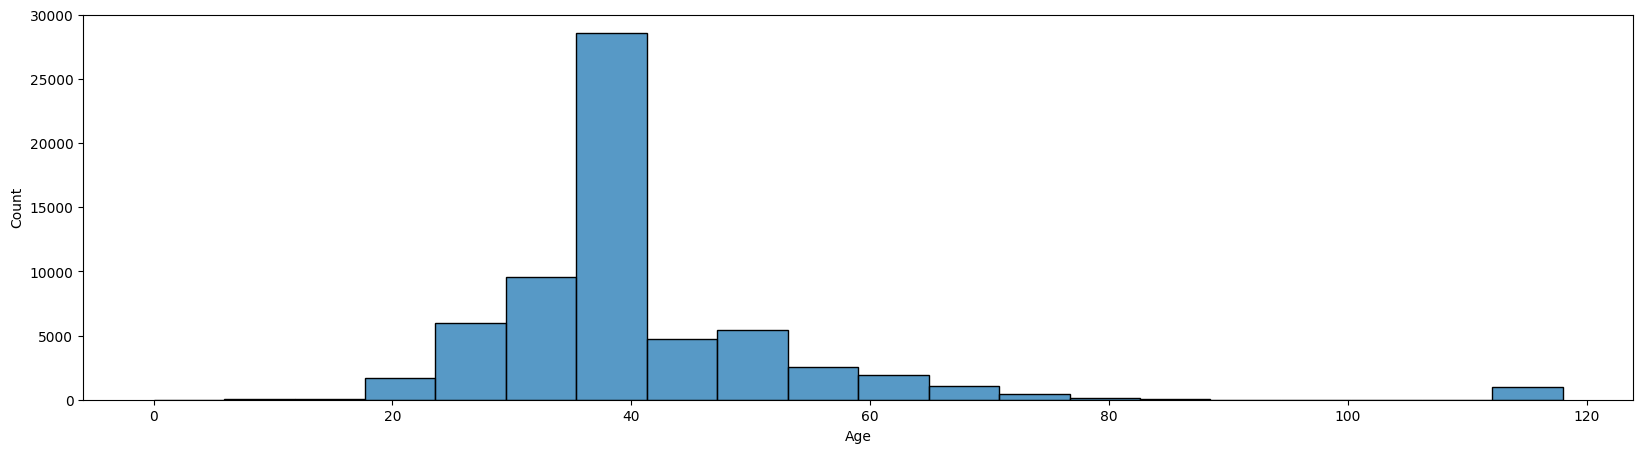

In [140]:
plt.figure(figsize = (20,5))
sns.histplot(data = df_travel, x = "Age", bins = 20)

Como vemos que los datos van disminuyendo en gran medida a medida que nos acercamos a los outliers, no los gestionaremos, salvo el valor de 118 años de edad que lo consideramos un error y lo sustituiremos.

In [141]:
df_travel["Age"].unique()

array([ 81,  71,  32,  41,  44,  29,  37, 118,  47,  48,  64,  36,  53,
        43,  58,  25,  34,  26,  30,  33,  35,  31,  61,  20,  46,  49,
        50,  62,  65,  24,  40,  21,  66,  57,  45,  52,  60,  27,  23,
        39,  59,  28,  67,  38,  72,  51,  55,  54,  69,  22,  78,  42,
        70,  68,  77,  63,  56,  79,  76,  16,  14,  73,  18,  19,  74,
        85,  84,  13,  75,  87,  80,  83,  12,  10,   8,  17,  15,   9,
        11,  86,   3,  82,   1,   5,  88,   2,   4,   0,   7])

Los cambiamos a np.nan para poder gestionarlos

KNN DE LOS QUE VIAJAN A INDIA, FRANCIA...

Los eliminamos porque tenemos suficientes datos. 

In [142]:
# Cambiamos los registros a np.nan

df_travel['Age'] = df_travel['Age'].replace(118, np.nan)

In [143]:
df_travel['Age'].unique()

array([81., 71., 32., 41., 44., 29., 37., nan, 47., 48., 64., 36., 53.,
       43., 58., 25., 34., 26., 30., 33., 35., 31., 61., 20., 46., 49.,
       50., 62., 65., 24., 40., 21., 66., 57., 45., 52., 60., 27., 23.,
       39., 59., 28., 67., 38., 72., 51., 55., 54., 69., 22., 78., 42.,
       70., 68., 77., 63., 56., 79., 76., 16., 14., 73., 18., 19., 74.,
       85., 84., 13., 75., 87., 80., 83., 12., 10.,  8., 17., 15.,  9.,
       11., 86.,  3., 82.,  1.,  5., 88.,  2.,  4.,  0.,  7.])

In [144]:
df_travel.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81.0
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71.0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32.0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32.0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41.0


In [145]:
# El outlier de 118 lo imputaremos mediante el método KNN.
imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(df_travel[['Age']])
age_knn= imputerKNN.transform(df_travel[['Age']])
df_age = pd.DataFrame(age_knn, columns = ['Age'])

In [ ]:
df_travel['Age'] = df_age['Age']

### OJO A PARTIR DE AHORA CAMBIAR DF LIMPIO POR DF A SECAS

In [146]:
pd.DataFrame(df_travel_limpio['Age'].value_counts()).index

Index([             36.0,              31.0,              48.0,
                    35.0,              30.0,              28.0,
                    29.0,              33.0,              32.0,
                    27.0,              34.0,              37.0,
                    26.0, 38.73836258060376,              39.0,
                    38.0,              45.0,              41.0,
                    43.0,              46.0,              42.0,
                    40.0,              44.0,              25.0,
                    47.0,              49.0,              53.0,
                    24.0,              51.0,              50.0,
                    52.0,              54.0,              57.0,
                    23.0,              56.0,              22.0,
                    55.0,              58.0,              59.0,
                    60.0,              61.0,              21.0,
                    63.0,              62.0,              64.0,
                    65.0,              6

In [ ]:
# Redondeamos el valor que hemos recibido de KNN a 0 decimales ya que es una edad.
df_travel_limpio['Age'] = df_travel_limpio['Age'].apply(lambda col:math.ceil(col))

In [153]:
df_travel_limpio

,Age
0,81.0
1,71.0
2,32.0
3,32.0
4,41.0
...,...
63321,31.0
63322,40.0
63323,57.0
63324,63.0


Exploramos nuestra variable respuesta:

In [152]:
value_counts = df_travel_limpio["Claim"].value_counts()

KeyError: 'Claim'

<Axes: ylabel='count'>

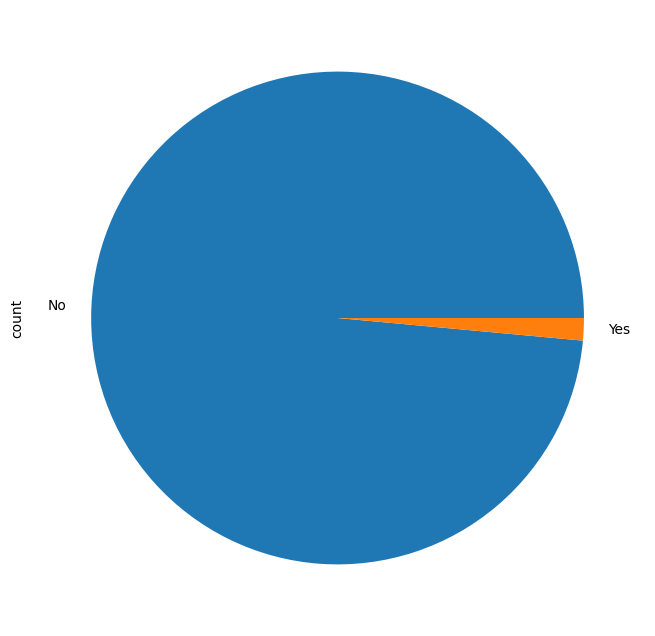

In [15]:
#Hacemos un pie de nuestra variable respuesta
value_counts.plot.pie(figsize=(8,8))

In [16]:
df_travel[df_travel["Product Name"]== "Bronze Plan"] 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,44
22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,25
23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,34
120,C2B,Airlines,Online,Bronze Plan,No,20,SINGAPORE,47.00,11.75,30
121,C2B,Airlines,Online,Bronze Plan,No,29,SINGAPORE,27.00,6.75,30
...,...,...,...,...,...,...,...,...,...,...
63209,C2B,Airlines,Online,Bronze Plan,No,17,SINGAPORE,32.40,8.10,59
63210,C2B,Airlines,Online,Bronze Plan,No,17,SINGAPORE,32.40,8.10,63
63211,C2B,Airlines,Online,Bronze Plan,No,56,SINGAPORE,86.50,21.63,1
63212,C2B,Airlines,Online,Bronze Plan,No,56,SINGAPORE,86.50,21.63,27


In [17]:
df_travel[df_travel["Net Sales"]== 32.40] 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
45708,C2B,Airlines,Online,Bronze Plan,No,14,SINGAPORE,32.4,8.1,33
47211,C2B,Airlines,Online,Bronze Plan,No,18,SINGAPORE,32.4,8.1,62
47772,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,32.4,8.1,36
48818,C2B,Airlines,Online,Bronze Plan,No,18,SINGAPORE,32.4,8.1,25
51475,C2B,Airlines,Online,Bronze Plan,No,183,SINGAPORE,32.4,8.1,45
51628,C2B,Airlines,Online,Bronze Plan,No,27,SINGAPORE,32.4,8.1,53
51629,C2B,Airlines,Online,Bronze Plan,No,27,SINGAPORE,32.4,8.1,53
51630,C2B,Airlines,Online,Bronze Plan,No,27,SINGAPORE,32.4,8.1,50
51631,C2B,Airlines,Online,Bronze Plan,No,27,SINGAPORE,32.4,8.1,57
56990,C2B,Airlines,Online,Bronze Plan,No,9,SINGAPORE,32.4,8.1,17
